
 <center>

<img src=https://www.cct.ie/wp-content/uploads/CCT_Logo_New_Aug_17-2.jpg width=600>

 </center>

 <center>
 
<div style="text-align: center"> <span style="font-size: 20px;"> <b>CCT College Dublin Continuous Assessment 1 </b> </span></div>

<div style="text-align: center"> <span style="font-size:20px;"><b>Machine Learnig</b> </span></div>
    
<b></b> 

<div style="text-align: center"> <span style="font-size: 14px;"><b> 2022455 - Ana Isabel Nieves Barcenas</b> </span></div>
    
<div style="text-align: center"> <span style="font-size: 14px;"><b> 2022310 - Bárbara Azevedo Pereira</b> </span></div>

<div style="text-align: center"> <span style="font-size: 14px;"><b> 2017207 - Daniela Daia</b> </span></div>

<div style="text-align: center"> <span style="font-size: 14px;"><b> 2022178 -  Vicente Rubio</b> </span></div>

    

    

    

 
    
    

</center>

# Passenger Satisfaction:
# What factors most impact short-haul dissatisfaction?


* Data Dictionary

* EDA
 * Characterisation of the data set
 * Descriptive Statistics
 * Outliers
 
 
* Handling with missing values
 * Imputing Missing Values
 
 
* Feature Engineering 
 * Dropping Columns 
 * Encoding
 * Sparsity of the data set
 * Splitting the data set into independent and dependent variables
 * Splitting the data set for training and test
 

* Training Data


* Apply ML model 
 * Logistic Regression
 * KNN
 * Random Forest 


* Improve the models
 * Scaling the data
 * Hyperparameters


* Result 




### Data Dictionary

- **ID:** Unique passenger identifier
- **Gender:** Gender of the passenger (Female/Male)
- **Age:** Age of the passenger
- **Customer Type:** Type of airline customer (First-time/Returning)
- **Type of Travel:** Purpose of the flight (Business/Personal)
- **Class:** Travel class in the airplane for the passenger seat
- **Flight Distance:** Flight distance in miles
- **Departure Delay:** Flight departure delay in minutes
- **Arrival Delay:** Flight arrival delay in minutes
- **Departure and Arrival Time Convenience:** Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Ease of Online Booking:** Satisfaction level with the online booking experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Check-in Service:** Satisfaction level with the check-in service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Online Boarding:** Satisfaction level with the online boarding experience from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Gate Location:** Satisfaction level with the gate location in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **On-board Service:** Satisfaction level with the on-boarding service in the airport from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Seat Comfort:** Satisfaction level with the comfort of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Leg Room Service:** Satisfaction level with the leg room of the airplane seat from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Cleanliness:** Satisfaction level with the cleanliness of the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Food and Drink:** Satisfaction level with the food and drinks on the airplane from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Service:** Satisfaction level with the in-flight service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Wifi Service:** Satisfaction level with the in-flight Wifi service from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **In-flight Entertainment:** Satisfaction level with the in-flight entertainment from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Baggage Handling:** Satisfaction level with the baggage handling from the airline from 1 (lowest) to 5 (highest) - 0 means "not applicable"
- **Satisfaction:** Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)



## EDA


**EDA** is used to investigate and analyse data sets and summarise their main characteristics, often using data visualisation methods. It helps determine the best way to manipulate data sources to better answer the needs of your case study, allowing you to discover patterns, detect anomalies, test a hypothesis or check assumptions.

As mentioned by (Boschetti and Luca Massaron, 2016) Exploratory data analysis EDA, or data exploration, is the first step in the data science process.



###  Characterisation of the data set

We need to import all the libraries that we need to use in this project, each library is used for a different purpose as you can see in the code; Python libraries are an excellent data analysis and machine learning tool. 



In [1]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

#Import for missing values 
import missingno as msno

# Confusion Matrix
from sklearn.metrics import confusion_matrix

#Hyperparameters 
from sklearn.model_selection import GridSearchCV

#Standardization
from sklearn.preprocessing import StandardScaler

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics  

#import models from scikit learn module:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#Cross validation
from sklearn.model_selection import cross_val_score

# Import this library to suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_airline= pd.read_csv("airline_passenger_satisfaction.csv") ## Importing the dataset
df_airline.head() # looking at the dataset

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df_airline.shape

(129880, 24)

To get a general and quick description of the dataset, we are going to use the pandas datafream.info() function, with this method we can print the information or summary of the data set, such as our data type, the number of columns that we have, non-values and memory usage.

As we can see we have a datafream with 129880 rows and 24 columns  including our label **"Satisfaction"**, also we have diferents data types

In [4]:
df_airline.info() #get some information about our DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

Descriptive statistics are used to easily describe the basic characteristics of data sets, they provide a simple summary of the sample and the measures, with them we can obtain simple graphs that help us to better understand the behaviour of our variables.

### Descriptive Statistics


In [5]:
df_airline.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In this case, the standard deviation result is lower than the mean and this is asymmetrical distribution. The plots above show the distribution of each variable in the dataset:


In [6]:
#sns.pairplot(df_airline)

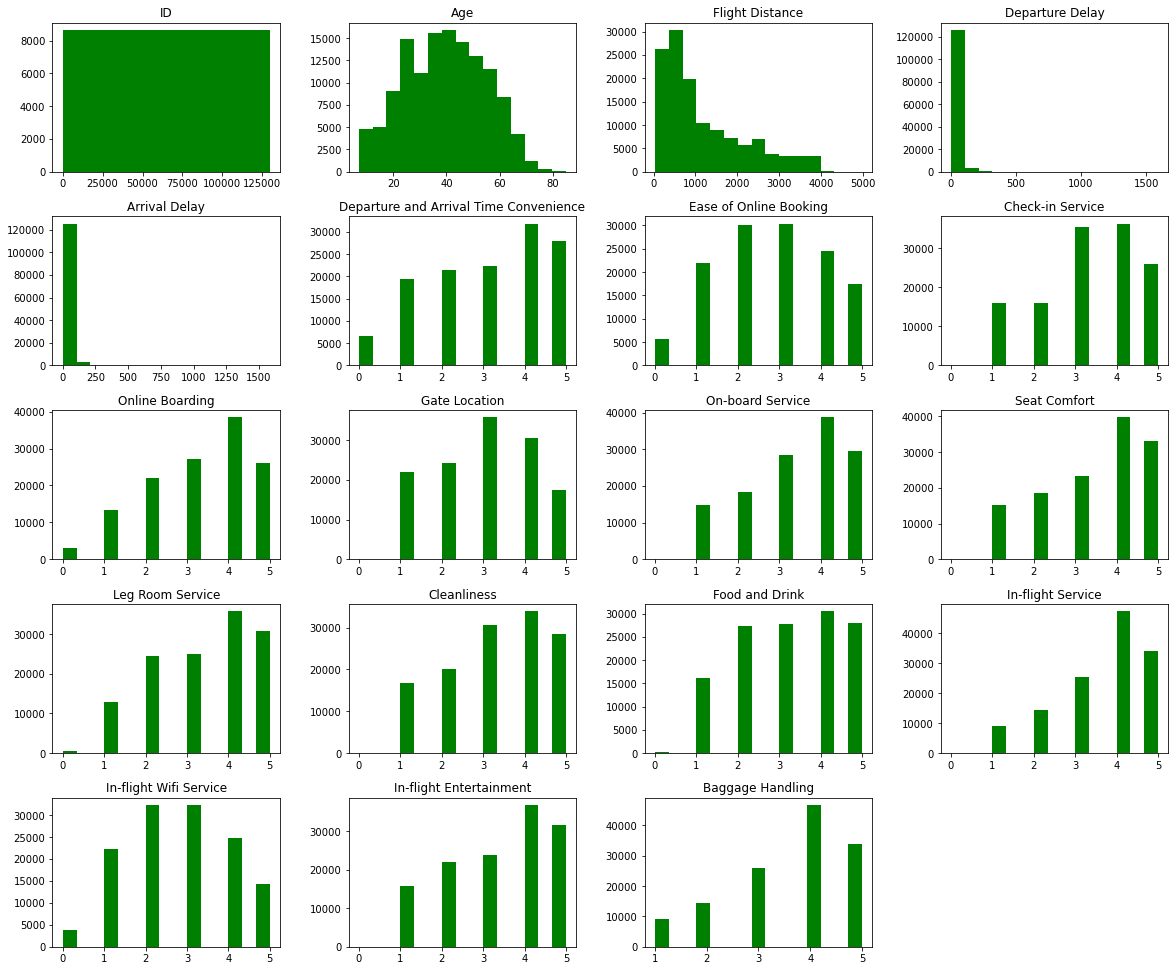

In [7]:
df_airline.hist(bins = 15 , layout = (5,4), figsize = (20,17)  ,column = df_airline.columns, grid = False,color="green")
plt.show()

Below we can see that we have also extracted the statistical values for our categorical variables, we are using bar plots to visualize the distribution of categorical data variables. They represent the distribution of discrete values.

In [8]:
df_airline.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


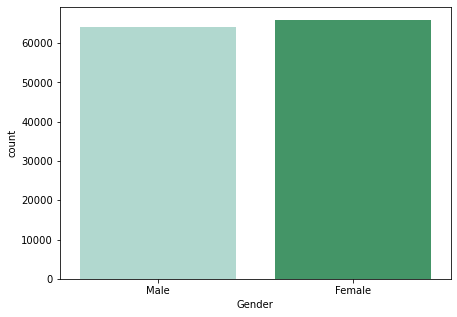

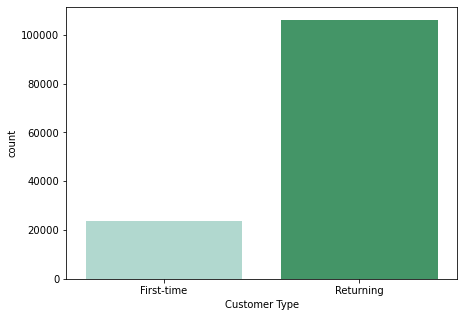

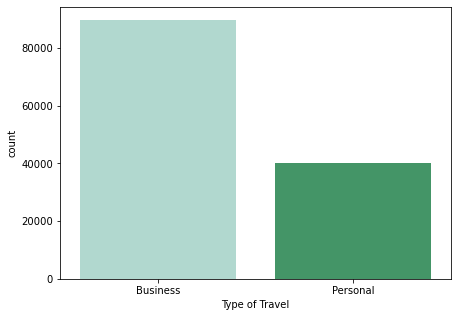

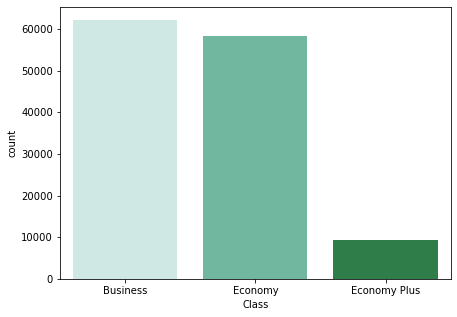

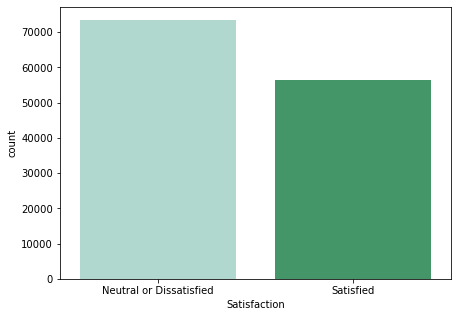

In [9]:
Columns= ['Gender', 'Customer Type','Type of Travel','Class','Satisfaction'  ]
for col in Columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df_airline,palette="BuGn")
    plt.show()

After looking at the distribution of our data, we could observe that not all values follow a symmetrical distribution, that's why we decided to get the skewness of our values to have a clearer idea of what kind of skew we have. 
we can notice that most of them have a negative skew. 

In [10]:
df_airline.skew()

ID                                        0.000000
Age                                      -0.003606
Flight Distance                           1.108142
Departure Delay                           6.821980
Arrival Delay                             6.670125
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service                        -0.691580
In-flight Wifi Service                    0.040465
In-flight Entertainment                  -0.366385
Baggage Handling                         -0.677400
dtype: float64

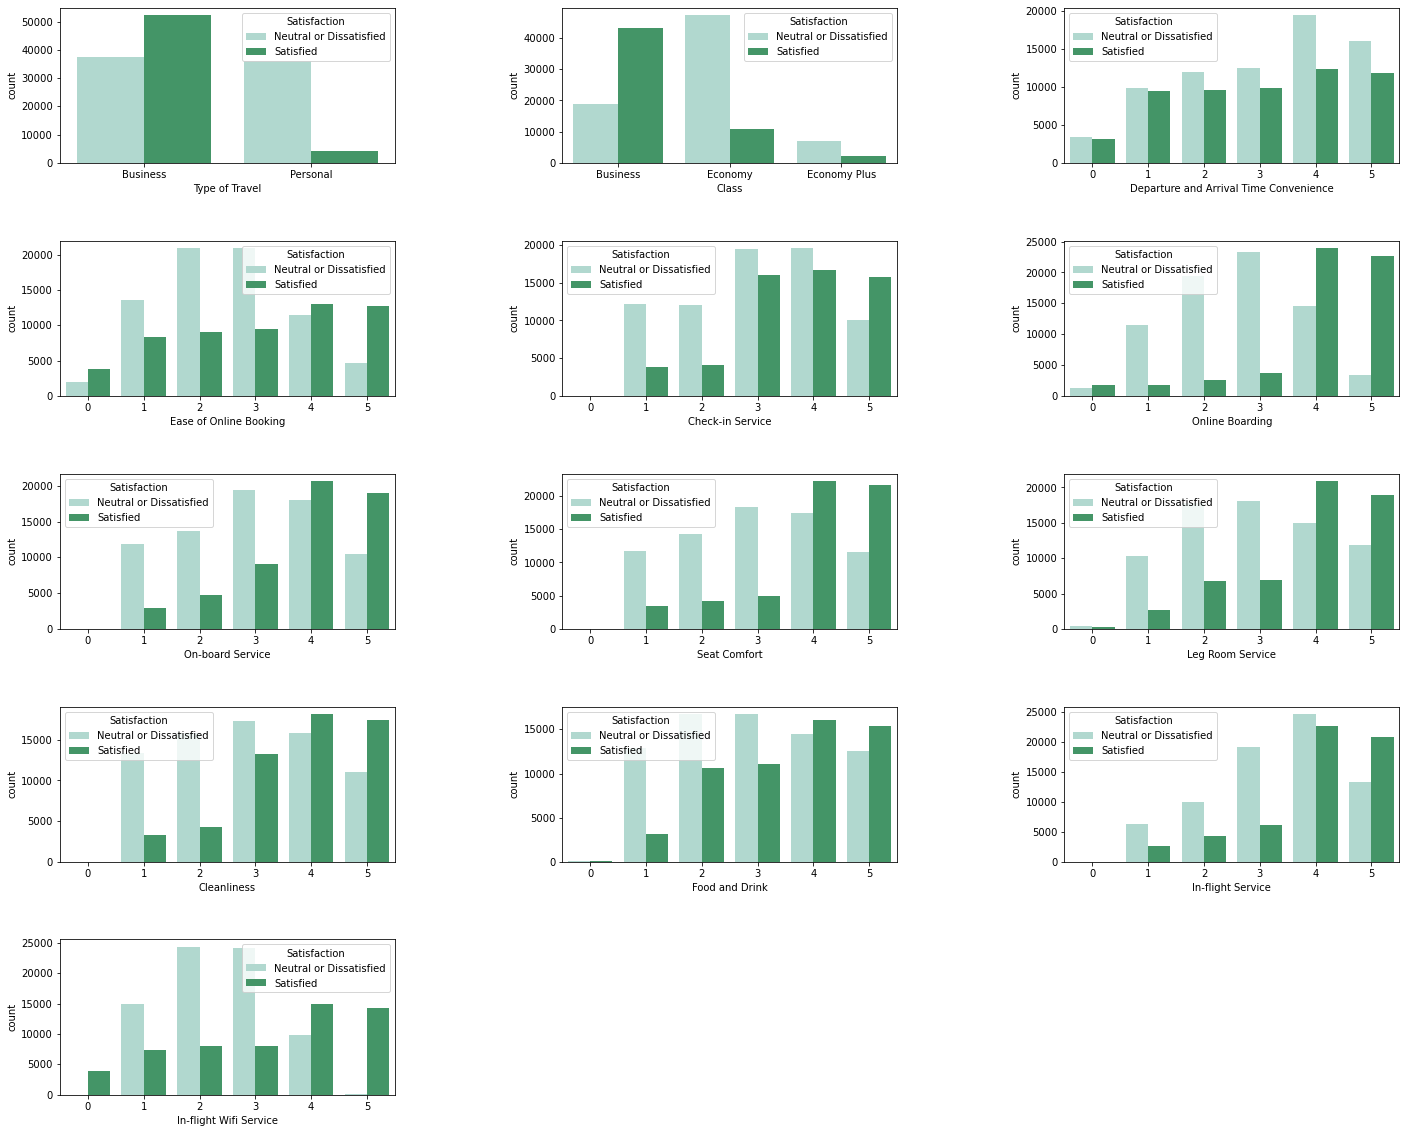

In [11]:
columns = ['Type of Travel', 'Class','Departure and Arrival Time Convenience',
      'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service','Seat Comfort', 
      'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service']
plt.figure(figsize=(24,20))

for col in range(len(columns)):
    plt.subplot(5,3,col+1)
    sns.countplot(x=df_airline[columns[col]],hue=df_airline['Satisfaction'],palette="BuGn")    
    plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

### Outliers

we can see in the boxplot below that we have at least 3 variables with presence of outliers, we can find this behaviour in the **fligt distance** variable, because our database has short flights from 31 to long flights of 4983 nautical miles. 
The same happens with **Departure Delay** and **Arrival Delay**, some flights are delayed by only a few minutes, while in some particular cases it can be more than 24 hours, while some are not delayed at all. 

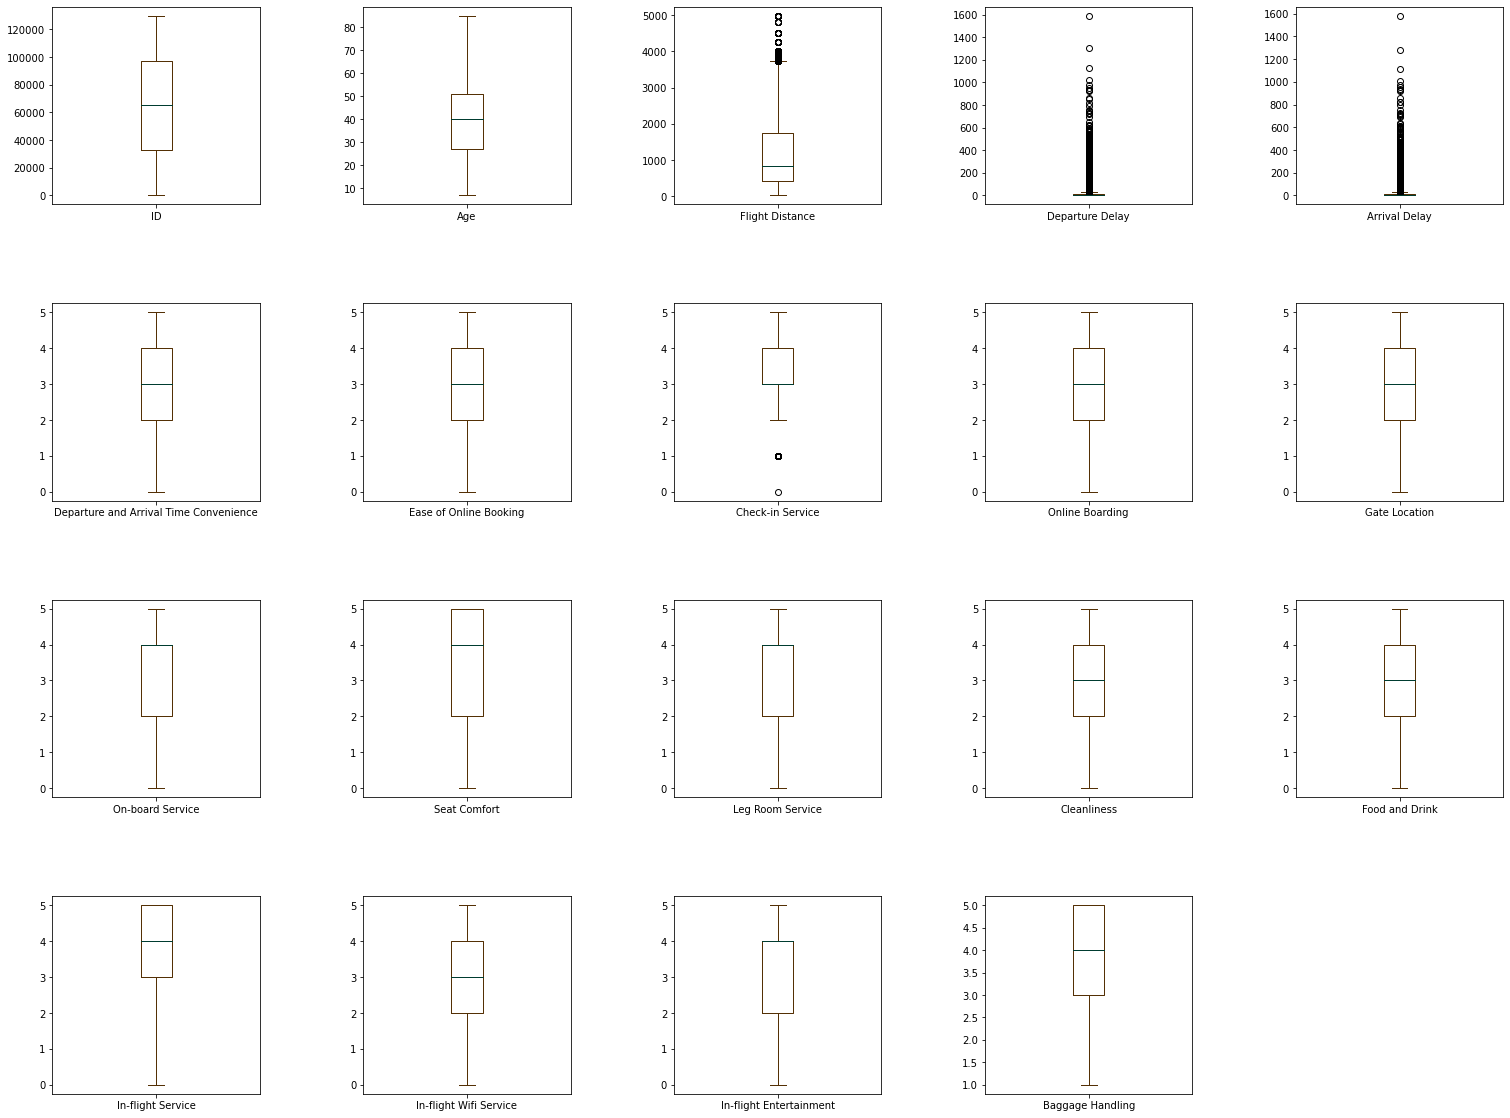

In [12]:
df_airline.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (26,20),colormap="BrBG")
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

Accordinfg to (Joshi, 2016) **Heat map** is a pictorial representation of data where two groups are associated point by point. The individual values that are contained in a matrix are represented as color values in the plot.

As seen in the heatmap above, there is a strong correlation between the “Arrival Delay” variable and the “Departure Delay “one. Between “In-flight-service” with the “Easy of Online Booking” and also with the “Cleanliness” and the “Seat Comfort”. 

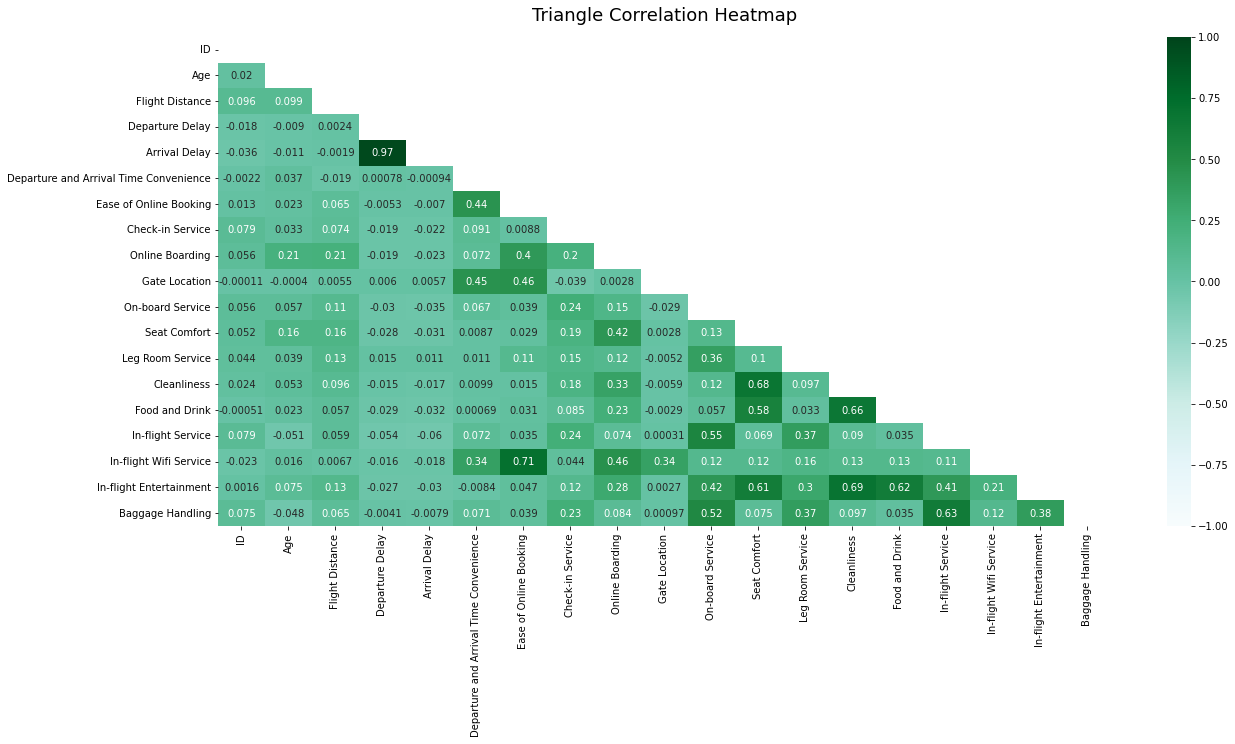

In [13]:
# shows the correlations between the values
plt.figure(figsize=(20, 9))

mask = np.triu(np.ones_like(df_airline.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(df_airline.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BuGn")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## Handling with missing values

Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases. (Kuhn and Johnson, 2019,p.189)

The easiest way to check for missing values is provided by the pandas library, they are insull() and notnull() these are functions that always return a binary value, in this case false or true indicating whether the value of the argument passed contains missing values. 

In [14]:
df_airline.isnull().sum() #check how many values are missing (NaN)

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

For this we will use a new python library called Missingno, this library is an excellent easy tool that provides us with a series of visualisations to understand the distribution of missing data within a dataframe panda.

<AxesSubplot:>

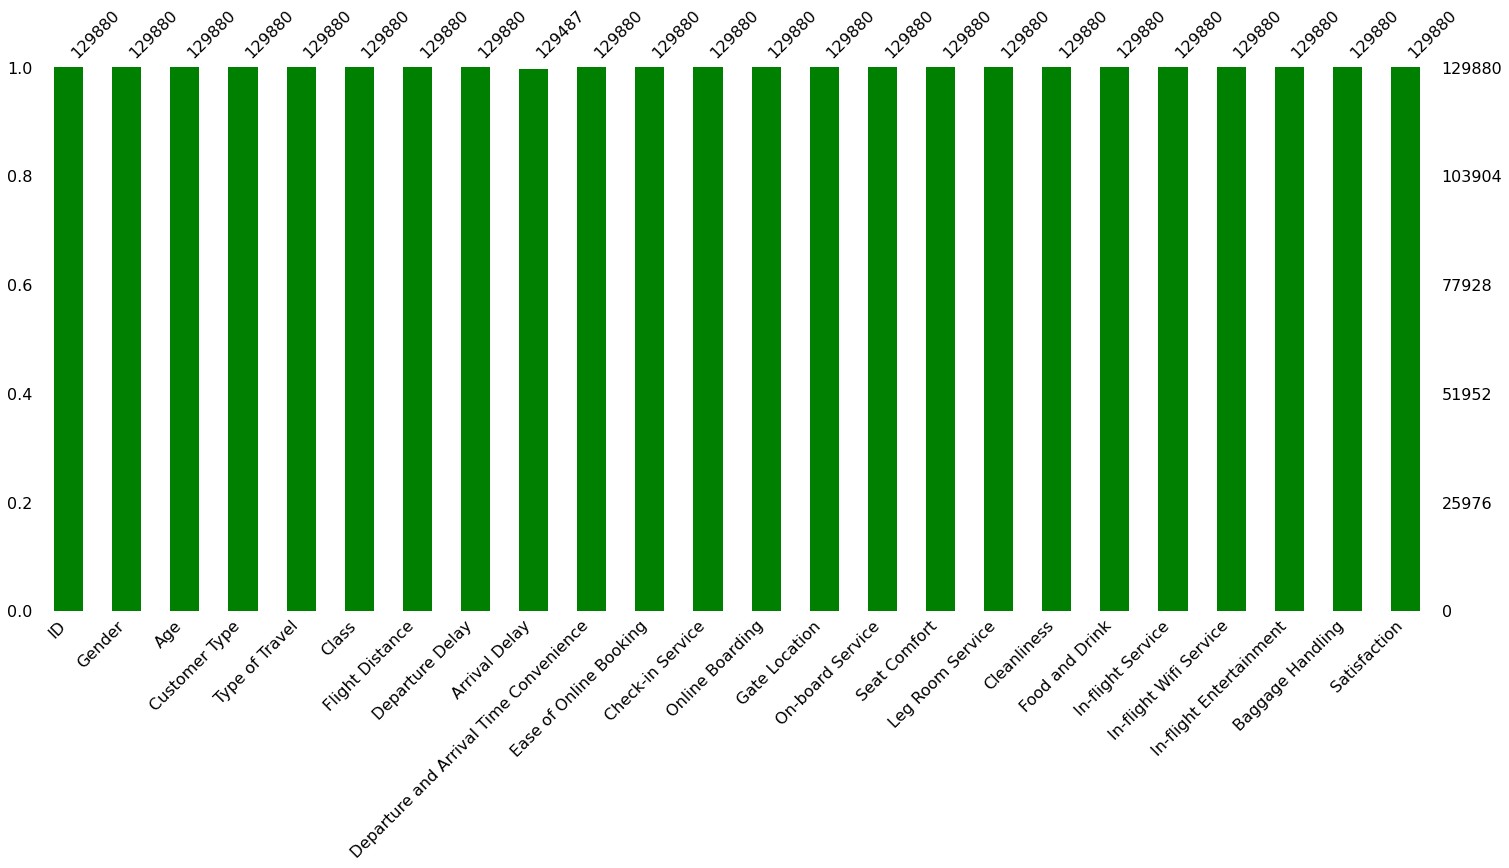

In [15]:
msno.bar(df_airline,color="green") #you can see the missing values 

We can see that the number of missing values are insignificant compared to the number of data contained in our dataset, we have only 393 missing values in the **Arrival Delay** variable, we have decided to impute those values with the median because according to our EDA, this variable does not follow a normal distribution, rather it tends to have a positive skew (6.670125). We can also see that we have outliers which could considerably affect our mean.

In [16]:
df_airline['Arrival Delay'].fillna(df_airline['Arrival Delay'].median(),inplace=True) #fill missing values 

In [17]:
df_airline.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [18]:
# Checking duplicated data
df_airline_duplicated_rows=df_airline[df_airline.duplicated()] 
df_airline_duplicated_rows.shape

(0, 24)

## Feature Engineering

According to our scenario we want to know what are the factors that impact the dissatisfaction of short distance flights on passengers, that is why we need to convert our categorical values to numerical values in order to classify the flights according to distance, for this we will rely on the aviation rules that classify them into short, medium and long distance. 

We will focus on short-haul flights. A short distance trip is known to have a distance of less than or equal to 800 nautical miles.

In [19]:
df_airline=df_airline[df_airline["Flight Distance"]<800]

we can see that the rows were reduced from 129880 to 62517,  approximately 48% less.

In [20]:
len (df_airline)

62517

In [21]:
df_airline.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
11,12,Female,27,First-time,Business,Business,421,20,21.0,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
12,13,Male,24,First-time,Business,Economy,453,16,30.0,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
30,31,Male,35,First-time,Business,Business,212,0,0.0,2,...,4,2,5,2,2,4,2,2,5,Neutral or Dissatisfied
31,32,Male,21,First-time,Business,Economy,173,0,0.0,0,...,5,3,5,3,3,4,4,3,4,Satisfied
32,33,Female,33,First-time,Business,Business,173,22,28.0,2,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied


### Dropping columns 


In [22]:
df_airline=df_airline.drop(['ID',"Gender","Age"],axis=1)

In [23]:
df_airline

,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
11,First-time,Business,Business,421,20,21.0,2,2,1,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
12,First-time,Business,Economy,453,16,30.0,2,2,2,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
30,First-time,Business,Business,212,0,0.0,2,2,5,2,...,4,2,5,2,2,4,2,2,5,Neutral or Dissatisfied
31,First-time,Business,Economy,173,0,0.0,0,4,3,4,...,5,3,5,3,3,4,4,3,4,Satisfied
32,First-time,Business,Business,173,22,28.0,2,2,5,2,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,...,4,4,5,3,3,4,5,3,5,Satisfied


###  Encoding

Encoding **class label**

Mapping "Satisfaction" variable as

Neutral or Dissatisfied :0                  
           Satisfied: 1





In [24]:
#df_airline['Satisfaction'] = df_airline['Satisfaction'].map(class_mapping)

Satis_mapp={'Neutral or Dissatisfied': 0, "Satisfied":1}

df_airline["Satisfaction"]=df_airline["Satisfaction"].map(Satis_mapp)

Satis_mapp


{'Neutral or Dissatisfied': 0, 'Satisfied': 1}

#### Mapping Ordinal Variables

Mapping **"Customer Type"** variable as

First-time :0                                     
Returning: 1

In [25]:
Cust_Type_mapp={'First-time': 0, "Returning":1}

df_airline["Customer Type"]=df_airline["Customer Type"].map(Cust_Type_mapp)

Cust_Type_mapp

{'First-time': 0, 'Returning': 1}

Mapping **"Type of Travel"** variable as 


Business: 0,  
Personal: 1

In [26]:
Type_travel_mapp={'Business': 0,  "Personal":1}

df_airline["Type of Travel"]=df_airline["Type of Travel"].map(Type_travel_mapp)

Mapping **"Class"** variable as 


Business: 0,  
Economy: 1,

Economy Plus: 2

In [27]:
Class_mapp={'Business': 0,  "Economy":1, "Economy Plus":2}

df_airline["Class"]=df_airline["Class"].map(Class_mapp)

In [28]:
print(df_airline['Class'].unique())

[0 1 2]


In [29]:
df_airline

,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
11,0,0,0,421,20,21.0,2,2,1,2,...,2,2,5,1,1,3,1,1,4,0
12,0,0,1,453,16,30.0,2,2,2,2,...,2,5,4,5,5,4,2,5,4,0
30,0,0,0,212,0,0.0,2,2,5,2,...,4,2,5,2,2,4,2,2,5,0
31,0,0,1,173,0,0.0,0,4,3,4,...,5,3,5,3,3,4,4,3,4,1
32,0,0,0,173,22,28.0,2,2,5,2,...,3,2,3,2,2,5,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,2,447,2,3.0,4,4,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,1,2,308,0,0.0,5,3,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,1,2,337,6,14.0,5,2,4,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,1,2,337,31,22.0,4,4,3,4,...,4,4,5,3,3,4,5,3,5,1


### Sparsity of the data set

we will check if the data set has sparse data. Sparse is a dataset with high zero values that can cause problems like over-fitting in the machine learning models and several other issues. However, our data set is not sparse, as seen below:


In [30]:
from scipy import sparse

In [31]:
sparse.issparse(df_airline) # how sparse is the dataset

False

## Splitting the dataset into independent and dependent variables

We need to split the data between the independent variable **X** and the dependent variable **Y** in order to apply the ML models. 

In [32]:

X= df_airline.iloc[:, 0:20].values

In [33]:
X

array([[0., 0., 0., ..., 1., 1., 4.],
       [0., 0., 1., ..., 2., 5., 4.],
       [0., 0., 0., ..., 2., 2., 5.],
       ...,
       [1., 1., 2., ..., 2., 3., 5.],
       [1., 1., 2., ..., 5., 3., 5.],
       [1., 1., 2., ..., 3., 2., 1.]])

In [34]:
y= df_airline.iloc[:,20:21 ].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

## Splitting the Data-Set for training and test 

Divide the data into different percentages for training and testing to check each of its accuracy.



#### Split 1 
Training= 80% , Testing 1 =20%


In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

In [36]:
from sklearn.dummy import DummyClassifier #DummyClassifier serves as a simple baseline to compare against other more complex classifiers.
bm1 = DummyClassifier()
bm1.fit(X_train1, y_train1)

DummyClassifier()

In [37]:
split1=bm1.score(X_test1, y_test1)# accuracy testing
print (split1)

0.6681062060140754


#### Split 2
Training = 85% , Testing 2 = 15%

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size = 0.15,
                                                    random_state = 0,
                                                    stratify = y)

In [39]:
bm2 = DummyClassifier()
bm2.fit(X_train2, y_train2)
split2=bm2.score(X_test2, y_test2)# accuracy testing
print (split2)

0.6680528897419492


In [40]:
split2=bm2.score(X_test2, y_test2)# accuracy testing
print (split2)

0.6680528897419492


#### Split 3
Training = 90 % , Testing 3 = 10%

In [41]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y,
                                                    test_size = 0.10,
                                                    random_state = 0,
                                                    stratify = y)

In [42]:
bm3 = DummyClassifier()
bm3.fit(X_train3, y_train3)

DummyClassifier()

In [43]:
split3=bm3.score(X_test3, y_test3)# accuracy testing
print (split3)

0.6681062060140754


#### Split 4
Training = 95 % , Testing 4 = 05%

In [44]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y,
                                                    test_size = 0.05,
                                                    random_state = 0,
                                                    stratify = y)

In [45]:
bm4 = DummyClassifier()
bm4.fit(X_train4, y_train4)

DummyClassifier()

In [46]:
split4=bm4.score(X_test4, y_test4)# accuracy testing
print (split4)

0.6679462571976967


#### Result 




Text(0.5, 1.0, 'Accuracy Scores with different splits')

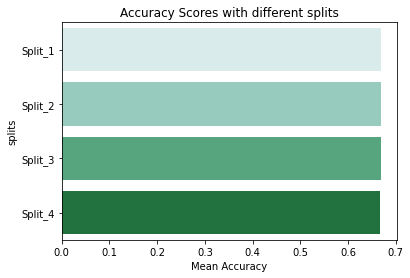

In [47]:
Accuracy = pd.DataFrame({"Accuracy":[0.6681062060140754,0.6680528897419492,0.6681062060140754,0.6679462571976967], "splits":["Split_1",
             "Split_2","Split_3","Split_4"]})

g = sns.barplot("Accuracy", "splits", data = Accuracy,palette ="BuGn")
g.set_xlabel("Mean Accuracy")
g.set_title("Accuracy Scores with different splits")

## Splitting the Data-Set

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify = y)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50013, 20), (12504, 20), (50013, 1), (12504, 1))

## Modeling 


In [50]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

In [51]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_result = cross_val_score (model, X_train, y_train, cv=kfold, scoring= "accuracy")
	results.append(cv_result)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

LR: 0.868014 (0.003814)
LDA: 0.862956 (0.004120)
KNN: 0.793454 (0.005110)
DT: 0.931878 (0.003324)
RFC: 0.953072 (0.002000)
NB: 0.855657 (0.004688)


### Logistic Regression

In [52]:
#CREAT THE MODEL
#Create a LogisticRegression
LR = LogisticRegression(solver='liblinear', multi_class='ovr')

#Train the model using the training sets
LR.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = LR.predict(X_test)

In [53]:
# EVALUATING MODEL
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
LR_Accuracy=metrics.accuracy_score(y_test, y_pred)
print (LR_Accuracy)

0.8700415866922585


A confusion matrix is a table that is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

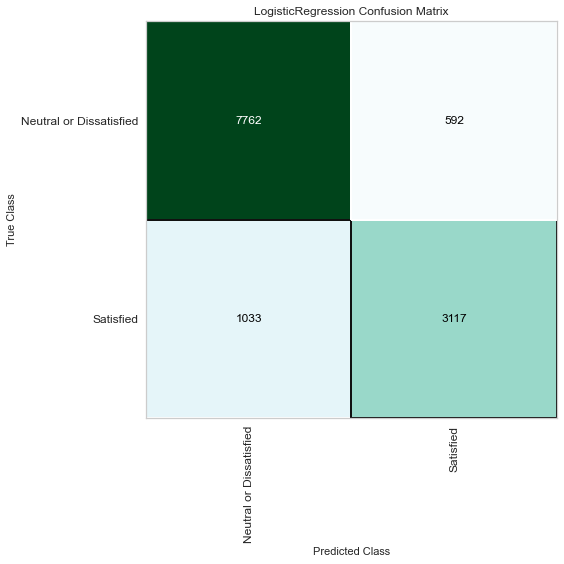

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
# Construct the Confusion Matrix
from yellowbrick.classifier import ConfusionMatrix
Satis_mapp = {0: "Neutral or Dissatisfied", 1: "Satisfied"}
fig, ax = plt.subplots(figsize=(8, 8))
cm_viz = ConfusionMatrix(LR,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

The confusion matrix tells us that we have 12504 flights in our test set. Out 8354 flights predicted as Neutral or Dissatisfied, 1033 were classified as Neutral or Dissatisfied when they are actually satisfied (type one error). Out 4150 flights predicted as satisfied, 592 were classified as satisfied when in fact they were not satisfied.

In [55]:
pd.DataFrame(confusion_matrix(y_test, LR.predict(X_test)),
    columns=[" Predict Neutral or Dissatisfied", "Predict Satisfied",],
    index=["True Neutral or Dissatisfied", "True Satisfied"],)

,Predict Neutral or Dissatisfied,Predict Satisfied
True Neutral or Dissatisfied,7762,592
True Satisfied,1033,3117


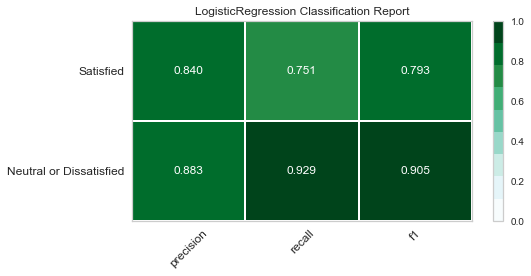

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [56]:
from yellowbrick.classifier import ClassificationReport

fig, ax = plt.subplots(figsize=(8, 4))
cm_viz = ClassificationReport(LR,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

**Precision**

Satisfied vr Neutral o Dissatisfied : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The interesting question is how many people are happy with the service? As can be seen in the precision, the rate of dissatisfied people is higher than the satisfied ones.

**Recall**

Satisfied vr Neutral o Dissatisfied: Recall is the ratio of correctly predicted positive observations to the all observations in actual class How many people are truly satisfied with the service? In our case, most people are really dissatisfied

**F1 Score**

Satisfied vr Neutral o Dissatisfied: The score is the weighted average of Precision and Recall. In our case, most people are really dissatisfied

In [57]:
# CROSS VALIDATION
LR_cvs = cross_val_score(estimator = LR, X = X_train, y = y_train,scoring='accuracy', cv = 10).mean()
print(LR_cvs.mean())

0.8679742140336426


#### Results Logistic Regression

Text(0.5, 1.0, 'Accuracy Scores')

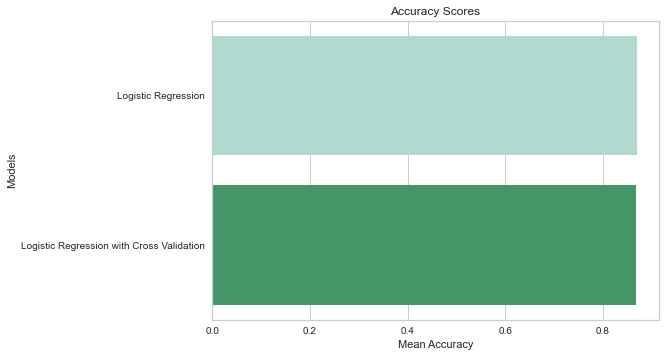

In [58]:
Accuracy = pd.DataFrame({"Accuracy":[0.8702015355086372,0.8681141740464382], "Models":["Logistic Regression",
             "Logistic Regression with Cross Validation"]})

g = sns.barplot("Accuracy", "Models", data = Accuracy,palette ="BuGn")
g.set_xlabel("Mean Accuracy")
g.set_title("Accuracy Scores")

**Is our model’s Overfitting or Underfitting? :**

The accuracy is almost the same, we can say that our results are good.

### k-Nearest Neighbors

In [59]:
#CREAT THE MODEL
#Create a LogisticRegression
KNN = KNeighborsClassifier()

#Train the model using the training sets
KNN.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = KNN.predict(X_test)

In [60]:
# EVALUATING MODEL
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
KNN_Accuracy=metrics.accuracy_score(y_test, y_pred)
print (KNN_Accuracy)

0.7943058221369161


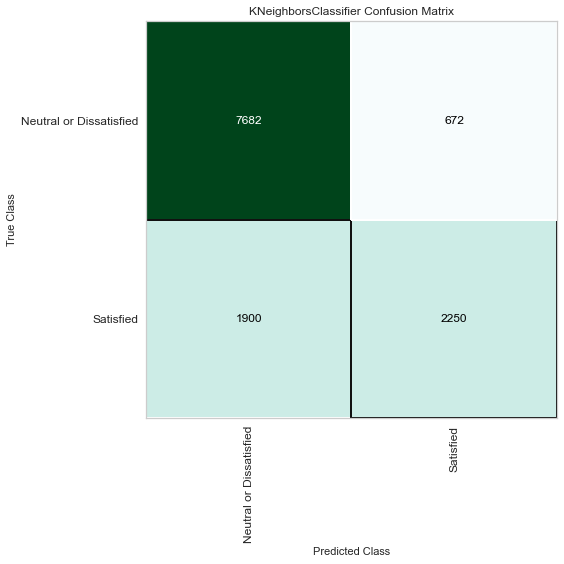

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [61]:
# Construct the Confusion Matrix
Satis_mapp = {0: "Neutral or Dissatisfied", 1: "Satisfied"}
fig, ax = plt.subplots(figsize=(8, 8))
cm_viz = ConfusionMatrix(KNN,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

The confusion matrix tells us that we have 12504 flights in our test set. Out 8354 flights predicted as Neutral or Dissatisfied, 1903 were classified as Neutral or Dissatisfied when they are actually satisfied (type one error). Out 4150 flights predicted as satisfied, 679 were classified as satisfied when in fact they were not satisfied.

In [62]:
pd.DataFrame(confusion_matrix(y_test, KNN.predict(X_test)),
    columns=[" Predict Neutral or Dissatisfied", "Predict Satisfied",],
    index=["True Neutral or Dissatisfied", "True Satisfied"],)

,Predict Neutral or Dissatisfied,Predict Satisfied
True Neutral or Dissatisfied,7682,672
True Satisfied,1900,2250


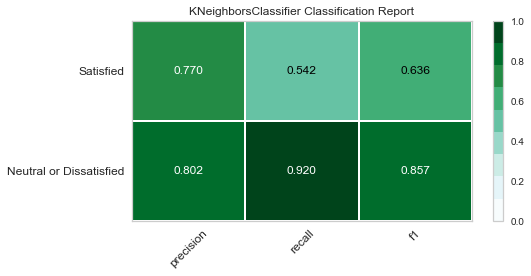

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))
cm_viz = ClassificationReport(KNN,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

**Precision**

Satisfied vrs Neutral o Dissatisfied : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The interesting question is how many people are happy with the service? As can be seen in the precision, the rate of dissatisfied people is higher than the satisfied ones.

**Recall**

Satisfied vrs Neutral o Dissatisfied: Recall is the ratio of correctly predicted positive observations to the all observations in actual class How many people are truly satisfied with the service? In our case, most people are really dissatisfied

**F1 Score**

Satisfied vrs Neutral o Dissatisfied: The score is the weighted average of Precision and Recall. In our case, most people are really dissatisfied


In [64]:
# CROSS VALIDATION
KNN_cvs = cross_val_score(estimator = KNN, X = X_train, y = y_train,scoring='accuracy', cv = 10).mean()
print(KNN_cvs.mean())

0.7950334003571137


#### KNN Results 

Text(0.5, 1.0, 'Accuracy Scores')

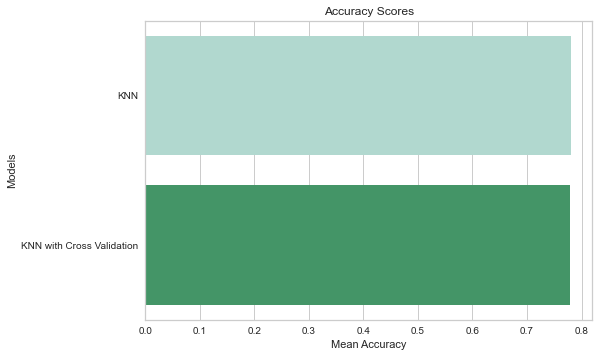

In [65]:
Accuracy = pd.DataFrame({"Accuracy":[0.7799763415421013,0.7787663176885913], "Models":["KNN",
             "KNN with Cross Validation"]})

g = sns.barplot("Accuracy", "Models", data = Accuracy,palette ="BuGn")
g.set_xlabel("Mean Accuracy")
g.set_title("Accuracy Scores")

**Is our model’s Overfitting or Underfitting? :**

we can see that the accuracy is higher than the accuracy with cross validation, that means that is **Overfitting**

### Random Forest 

In [66]:
#CREAT THE MODEL
#Create a LogisticRegression
RFC = RandomForestClassifier()

#Train the model using the training sets
RFC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RFC.predict(X_test)

In [67]:
# EVALUATING MODEL
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
RFC_Accuracy=metrics.accuracy_score(y_test, y_pred)
print (RFC_Accuracy)

0.9521753039027511


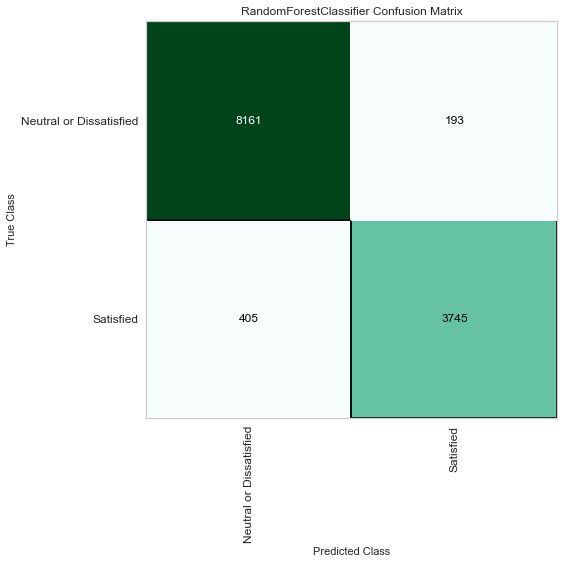

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [68]:
Satis_mapp = {0: "Neutral or Dissatisfied", 1: "Satisfied"}
fig, ax = plt.subplots(figsize=(8, 8))
cm_viz = ConfusionMatrix(RFC,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

The confusion matrix tells us that we have 12504 flights in our test set. Out 8354 flights predicted as Neutral or Dissatisfied, 403 were classified as Neutral or Dissatisfied when they are actually satisfied (type one error). Out 4150 flights predicted as satisfied, 215 were classified as satisfied when in fact they were not satisfied.

The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

according to the previous sentence random forest is the best model because it is the model with the best classification, as we can see that its diagonal is high.

In [69]:
pd.DataFrame(confusion_matrix(y_test, RFC.predict(X_test)),
    columns=[" Predict Neutral or Dissatisfied", "Predict Satisfied",],
    index=["True Neutral or Dissatisfied", "True Satisfied"],)

,Predict Neutral or Dissatisfied,Predict Satisfied
True Neutral or Dissatisfied,8161,193
True Satisfied,405,3745


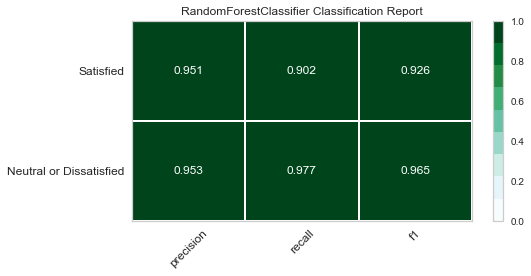

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
cm_viz = ClassificationReport(RFC,
    classes=["Neutral or Dissatisfied", "Satisfied"],
    label_encoder=Satis_mapp,cmap='BuGn')
cm_viz.score(X_test, y_test)
cm_viz.poof()

**Precision**

Satisfied vr Neutral o Dissatisfied : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The interesting question is how many people are happy with the service? As can be seen in the precision, In our case the precision are almost the same in the same, there is no favorite

**Recall**

Satisfied vr Neutral o Dissatisfied: Recall is the ratio of correctly predicted positive observations to the all observations in actual class How many people are truly satisfied with the service? In our case, most people are really dissatisfied

**F1  Score**
Satisfied vr Neutral o Dissatisfied: The score is the weighted average of Precision and Recall. In our case, most people are really dissatisfied

In [71]:
# CROSS VALIDATION
RFC_cvs = cross_val_score(estimator = RFC, X = X_train, y = y_train,scoring='accuracy', cv = 10).mean()
print(RFC_cvs.mean())

0.9518124683739781


#### Result Random Forest 

Text(0.5, 1.0, 'Accuracy Scores')

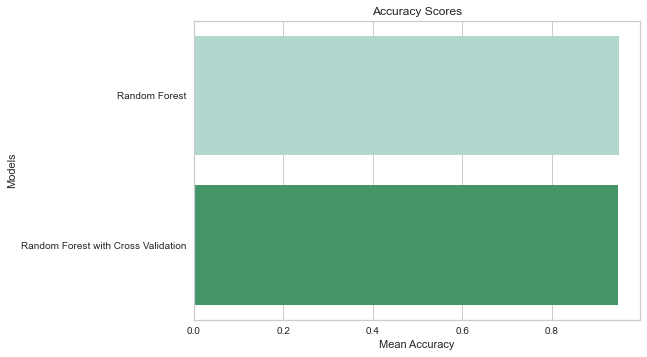

In [72]:
Accuracy = pd.DataFrame({"Accuracy":[0.9502096999677385,0.9490804702385599], "Models":["Random Forest",
             "Random Forest with Cross Validation"]})

g = sns.barplot("Accuracy", "Models", data = Accuracy,palette ="BuGn")
g.set_xlabel("Mean Accuracy")
g.set_title("Accuracy Scores")

**Is our model’s Overfitting or Underfitting? :** 

The accuracy is almost the same, we can say that our results are good.

## Improve the ML Models

### Scaling 

In [73]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train_scaled = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test_scaled = sc.transform(X_test)

### Hyperparameters 

In [74]:
random_state=42
classifier = [RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}
logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [75]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train_scaled ,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.9543917765827082
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8697537181887893
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.928278634556975


In [76]:
print(best_estimators[:])

[RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42), LogisticRegression(C=0.001, random_state=42), KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')]


Text(0.5, 1.0, 'Cross Validation Scores')

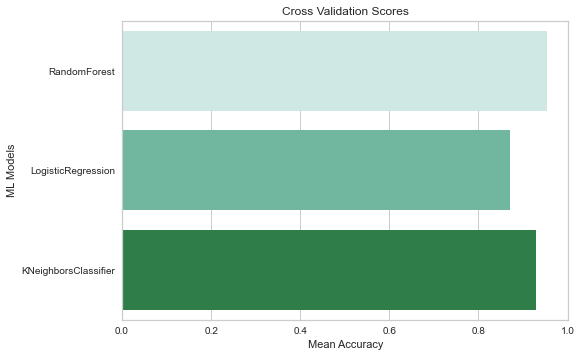

In [77]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9543917765827082,0.8697537181887893,0.928278634556975], "ML Models":["RandomForest",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results,palette ="BuGn")
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

After improving our models, we can see in the graph that the random forest model is the one with the highest accuracy with 95% , so we have chosen this model to obtain the most important features that impact on customer satisfaction.

## Results 

In [78]:
RFC_BM = RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42)

RFC_BM.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=42)

 1) In-flight Entertainment        0.274160
 2) Gate Location                  0.240379
 3) Class                          0.115067
 4) Flight Distance                0.060927
 5) Baggage Handling               0.042964
 6) Type of Travel                 0.040036
 7) Check-in Service               0.031775
 8) Online Boarding                0.022607
 9) In-flight Wifi Service         0.021694
10) Satisfaction                   0.021471
11) Departure Delay                0.020289
12) Cleanliness                    0.019499
13) Leg Room Service               0.019327
14) Seat Comfort                   0.015565
15) Ease of Online Booking         0.011509
16) Food and Drink                 0.010695
17) On-board Service               0.009626
18) Departure and Arrival Time Convenience 0.009604
19) Arrival Delay                  0.007516
20) In-flight Service              0.005290


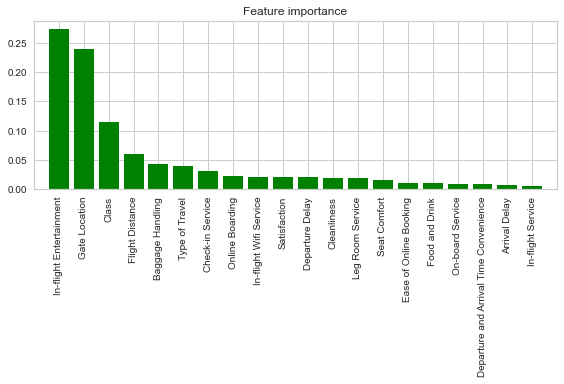

In [79]:
feat_labels = df_airline.columns[1:]
importances = RFC_BM.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',color ="Green")

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

## References


Analytics Vidhya. (n.d.). Analytics Vidhya - Learn Machine learning, artificial intelligence, business analytics, data science, big data, data visualizations tools and techniques. [online] Available at: https://www.analyticsvidhya.com/.


Avinash Navlani (2018). Naive Bayes Classification using Scikit-learn. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn.


Boschetti, A. and Luca Massaron (2016). Python data science essentials : become an efficient data science practitioner by understanding Python’s key concepts. Birmingham, England ; Mumbai, India: Packt Publishing.


Idris, I. (2016). Python Data Analysis Cookbook. Packt Publishing.


Joshi, P. (2016). Python machine learning cookbook : 100 recipes that teach you how to perform various machine learning tasks in the real world. Birmingham, UK: Packt Publishing.


Kuhn, M. and Johnson, K. (2019). Feature Engineering and Selection. CRC Press.


Sarang Narkhede (2018). Understanding Confusion Matrix. [online] Medium. Available at: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62.
